In this notebook, I will experiment with some clustering algorithms including k-means, Gaussian Mixture Models and DBSCAN. These models have there assumptions. Lets check out on which kind of datasets these algorithms work best. In particular, we will look at:
- An isotropic gaussian dataset
- An anisotropic gaussian dataset
- An isotropic gaussian dataset with different densities

For each dataset, we will look at the distribution and apply different algorithms to see which one works best. Also, we will investigate the assumptions behind these models and try to understand at a low-level why certain algorithms don't work well on specific datasets. 

## Isotropic Gaussian Dataset
We start by making a dataset using the Sklearn library. 

### Import and visualize the data

In [2]:
#Import the library which generates isotropic Gaussian blobs for clustering. 
from sklearn.datasets import make_blobs

#Create the dataset
X, y = make_blobs(n_samples=1500, random_state=42)

#Check the data
#print(X)
#print(y)

#Print the shapes
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (1500, 2)
y.shape = (1500,)


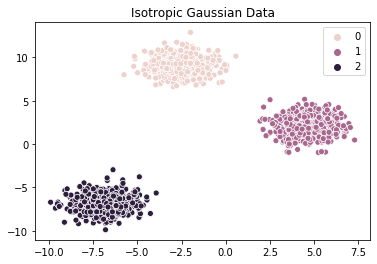

In [3]:
#Plot the data 
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.title("Isotropic Gaussian Data")
plt.show()

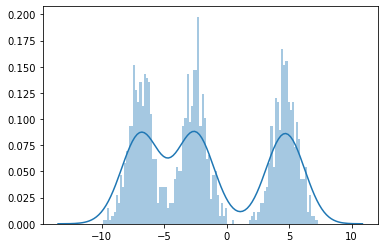

In [4]:
#Plot the first feature
sns.distplot(X[:,0], bins=100)
plt.show()

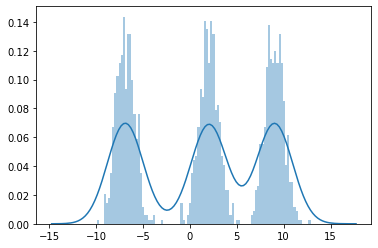

In [5]:
#Plot the second feature
sns.distplot(X[:,1], bins=100)
plt.show()

In [6]:
import numpy as np

sigma_1 = np.std(X[:,0])
sigma_2 = np.std(X[:,1])

print(sigma_1)
print(sigma_2)

4.8704797736228045
6.586650615159653


(1500, 1500)

### K-means
Lets fit a K-means model to the data and visualize the results. 

Cluster centers: 
[[-6.88666421 -6.85834942]
 [-2.5031025   9.04839015]
 [ 4.69161308  2.05025033]]



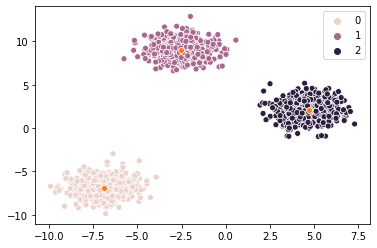

In [5]:
#Kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

#Print the k-means cluster centers
print("Cluster centers: \n{}".format(kmeans.cluster_centers_))
print()

#Plot the results of the K-means algorithm
sns.scatterplot(X[:, 0], X[:, 1], hue=kmeans.labels_)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
plt.show()


Another way to think about k-means is that is places circles at the center of each cluster, with the radius defined by the most distant point in the cluster. This radius acts as a hard cut-off for the cluster assignment. Lets see this in a plot.

In [6]:
#Define a function which plots k-means circles
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X): 
    
    #Fit the model to the data
    kmeans.fit(X)

    #Find the datapoint which is most distant from the cluster center
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    
    fig, ax = plt.subplots(figsize=(14,14))

    for c, r in zip(centers,radii):

        #Define the circle
        draw_circle = plt.Circle(c, r, fc="#CCCCCC", lw=10, alpha=0.5)

        #Draw the circle
        ax.add_patch(draw_circle)

    #Plot the original data
    sns.scatterplot(X[:, 0], X[:, 1], hue=kmeans.labels_, ax=ax)
    
    #Set aspect to one so that the circle really seems like a circle
    ax.set_aspect(1)
    
    plt.title("K-means clustering")

    plt.show()

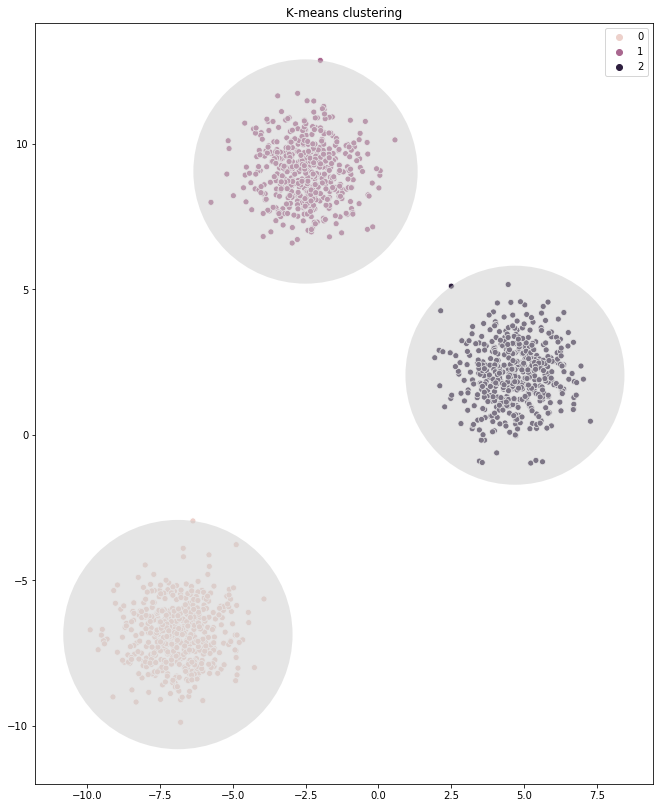

In [7]:
#Plot k-means circles
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)

### Gaussian Mixture Model
Lets fit a GMM model to the data and visualize the results. 

In [8]:
#Gaussian mixture model
from sklearn.mixture import GaussianMixture
gaussian = GaussianMixture(n_components=3, n_init=10)
gaussian.fit(X)

#Look at the parameters the algorithm has estimated
weights = gaussian.weights_
print("Weights = {}".format(weights))

means = gaussian.means_
print("\nMeans = \n{}".format(means))

covar = gaussian.covariances_
print("\nCovariances = \n{}".format(covar))

Weights = [0.33333333 0.33333333 0.33333333]

Means = 
[[-2.50310249  9.04839014]
 [-6.88666421 -6.85834942]
 [ 4.69161309  2.05025032]]

Covariances = 
[[[ 0.9367188  -0.02421124]
  [-0.02421124  0.98016642]]

 [[ 0.96447174  0.04333613]
  [ 0.04333613  0.97825939]]

 [[ 0.91818198  0.02676706]
  [ 0.02676706  1.07298475]]]


In [9]:
#Check whether the Gaussian Mixture Algorithm has converged and how many iterations it took
print(gaussian.converged_)
print(gaussian.n_iter_)

True
2


In [10]:
#Predict the probability of each instance belonging to a specific cluster
pred = gaussian.predict_proba(X) #Predict_proba is for soft clustering
print("Amount of predictions: {}".format(len(pred)))
print("\nPredictions: \n{}".format(pred))

Amount of predictions: 1500

Predictions: 
[[3.49403150e-20 2.32613160e-48 1.00000000e+00]
 [2.73954430e-69 1.00000000e+00 8.68958014e-52]
 [5.13328237e-71 1.00000000e+00 1.74879869e-49]
 ...
 [3.40947641e-29 1.26005749e-56 1.00000000e+00]
 [2.49097872e-64 1.00000000e+00 2.00441299e-47]
 [1.25229721e-24 2.98014540e-61 1.00000000e+00]]


In [11]:
#Define a function which plots Gaussian Mixture Model. This code is directly copied from this link: 
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse
import numpy as np

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    plt.figure(figsize=(14,14))
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels, s=15, cmap='viridis', zorder=2)
    else:
        sns.scatterplot(X[:, 0], X[:, 1], s=15, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
    plt.title("Gaussian Mixture Model clustering")
    

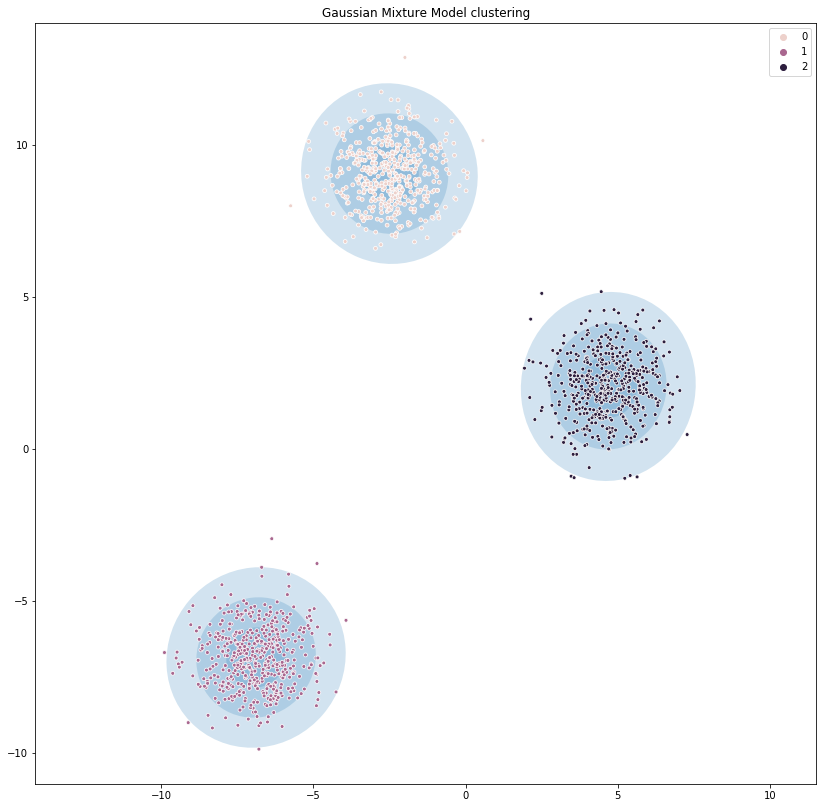

In [12]:
#Plot the Gaussian distribution
gaussian = GaussianMixture(n_components=3, n_init=10)
plot_gmm(gaussian, X)

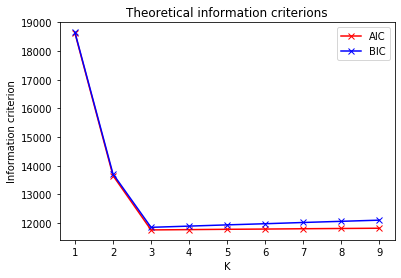

In [13]:
#Selecting the number of clusters using BIC and AIC
aics = []
bics = []

#Set K (number of clusters)
K = [i for i in range(1,10)]

for k in K:
    
    #Fit the model to the data
    gaussian = GaussianMixture(n_components=k, n_init=10)
    gaussian.fit(X)
    
    #Calculate AIC and BIC
    aic = gaussian.aic(X)
    bic = gaussian.bic(X)
    
    #Add to list
    aics.append(aic)
    bics.append(bic)
    
plt.plot(K, aics, "bx-", c="r", label="AIC")
plt.plot(K, bics, "bx-", c="b", label="BIC")
plt.xlabel("K")
plt.ylabel("Information criterion")
plt.title("Theoretical information criterions")
plt.legend()
plt.show()

We can see that at K=3, we have the lowest values for BIC and AIC. 

## Anisotropic Gaussian Dataset
Lets now create another dataset, which is anisotropic Gaussian (no circle blobs, but ellipses). For this, we will use the same dataset as before and perform a transformation on it. 

### Import and visualize the data

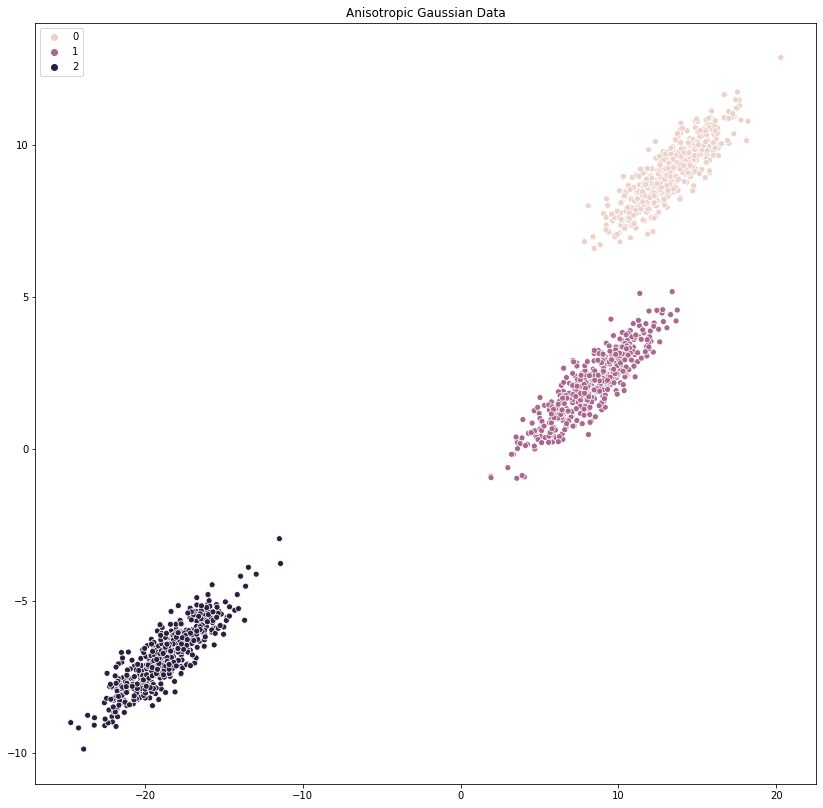

In [14]:
import numpy as np

#Create the following rotation matrix
# [[1           0],
# [tan(thetha) 1]]

theta = np.radians(60)
t = np.tan(theta)
shear_x = np.array(((1, t), (0, 1))).T

#Multiply original data with rotation matrix
X_rotated = X.dot(shear_x)

#Plot the data
plt.figure(figsize=(14,14))
sns.scatterplot(X_rotated[:, 0], X_rotated[:, 1], hue=y)
plt.title("Anisotropic Gaussian Data")
plt.show()

Lets look at the distribution of the data.

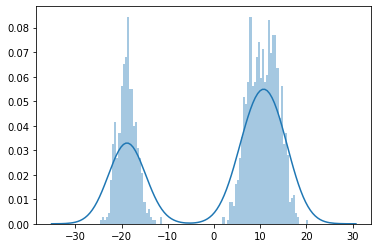

In [28]:
#Plot the first feature
sns.distplot(X_rotated[:,0], bins=100)
plt.show()

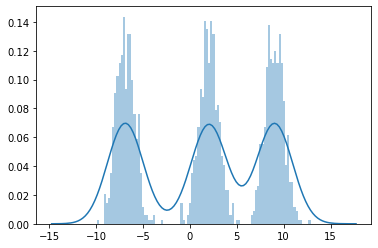

In [29]:
#Plot the second feature
sns.distplot(X_rotated[:,1], bins=100)
plt.show()

### K-means
Lets fit a K-means model to the data and visualize the results.

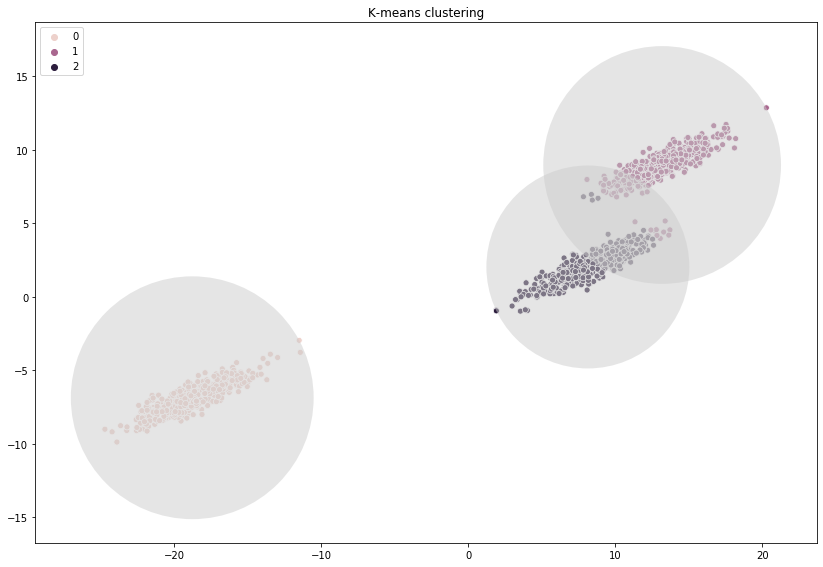

In [15]:
#Kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_rotated)

#Print the k-means cluster centers
kmeans.cluster_centers_

#Plot the results of the K-means algorithm
plot_kmeans(kmeans, X_rotated)

We can see clearly that the K-means algorithm doesn't work well on data which is not circular/spherical. K-means tries to cluster the data in a circulay way, but that just doesn't work with anisotropic data (non-circular data).

### Gaussian Mixture Model
Lets fit a GMM model to the data and visualize the results. 

In [16]:
#Gaussian mixture model
from sklearn.mixture import GaussianMixture
gaussian = GaussianMixture(n_components=3, n_init=10)
gaussian.fit(X_rotated)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

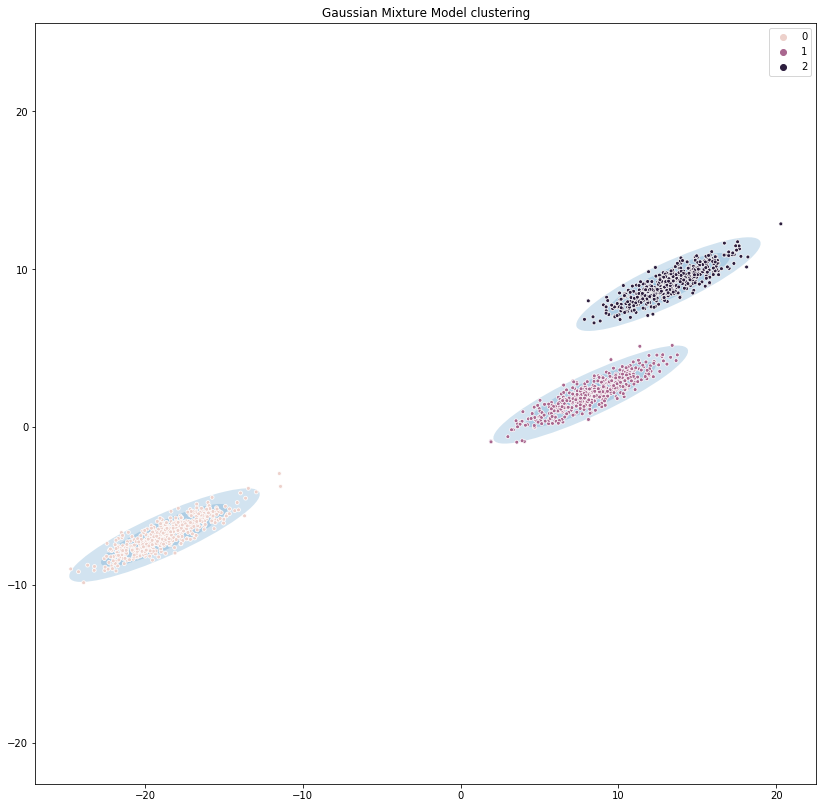

In [17]:
plot_gmm(gaussian, X_rotated)

The GMM model works really well. It addresses the two main practical issues with k-means: 
- its lack of flexibility in cluster shape
- its lack of probabilistic cluster assignment

### GMM as Density Estimation

Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for *density estimation*. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data. We can use GMM to create new samples from the distribution defined by the input data.

## Anisotropic Gaussian Dataset with different densities 

We create a dataset with two clusters: One at the top-right with high density and one at bottom-left with low density. 

### Import and visualize the data

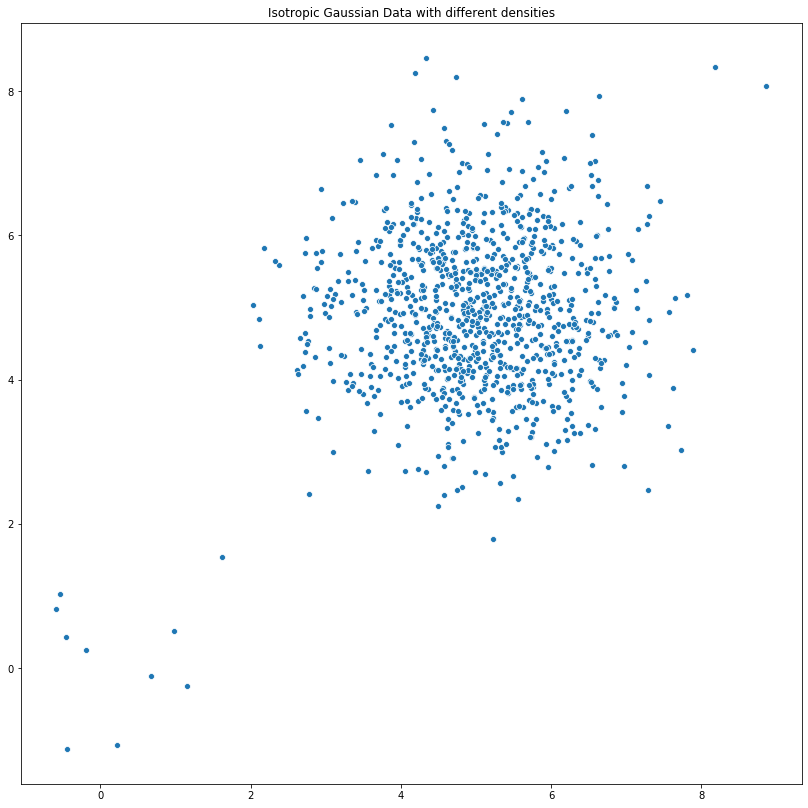

In [30]:
X1, y1 = make_blobs(n_samples=1000, n_features=2, centers=1, center_box=(5,5), random_state=100)
X2, y2 = make_blobs(n_samples=10, n_features=2, centers=1, center_box=(0,0), random_state=100)

X = np.concatenate([X1, X2])
y = np.concatenate([y1, y2])

plt.figure(figsize=(14,14))
sns.scatterplot(X[:, 0], X[:, 1])
plt.title("Isotropic Gaussian Data with different densities")
plt.show()

Lets look at the distribution of the data.

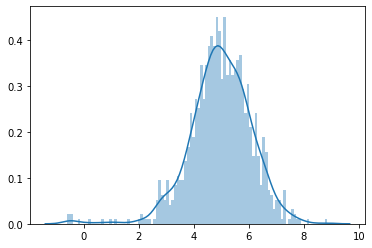

In [31]:
#Plot the first feature
sns.distplot(X[:,0], bins=100)
plt.show()

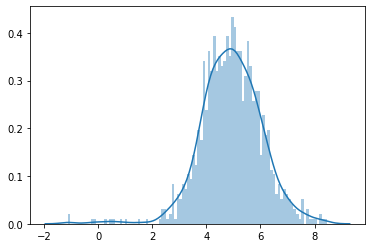

In [32]:
#Plot the first feature
sns.distplot(X[:,1], bins=100)
plt.show()

### K-means
Lets fit a K-means model to the data and visualize the results.

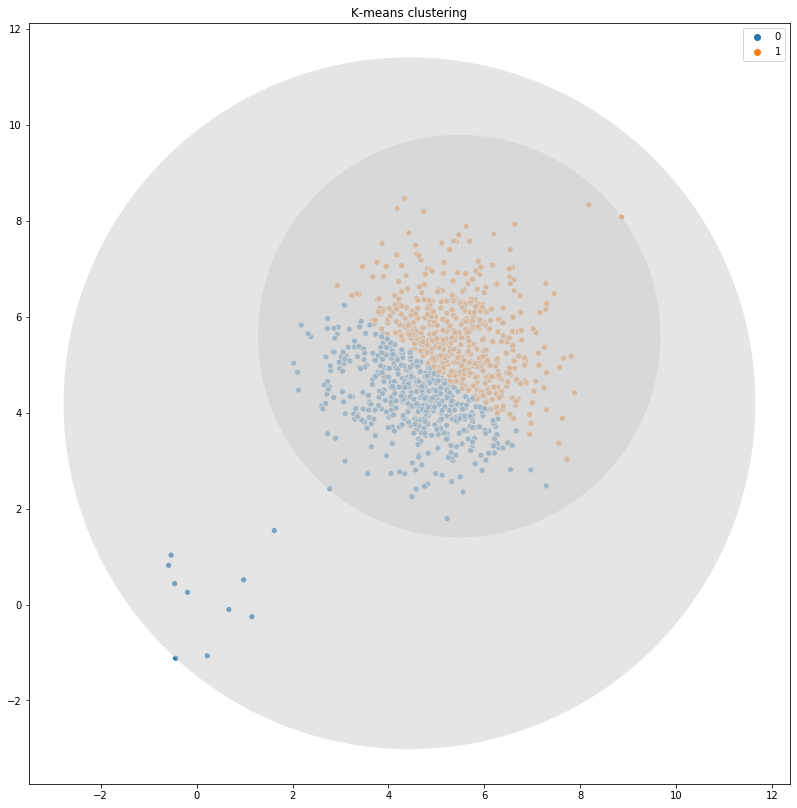

In [33]:
#Plot the results of the K-means algorithm
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, X)

The inside circle is the cluster for the orange datapoint and the outside circle is the cluster for the blue datapoints. We see again that the k-means algorithm tries to cluster the datapoints in a circular fashion. 

### Gaussian Mixture Model
Lets fit a GMM model to the data and visualize the results. 

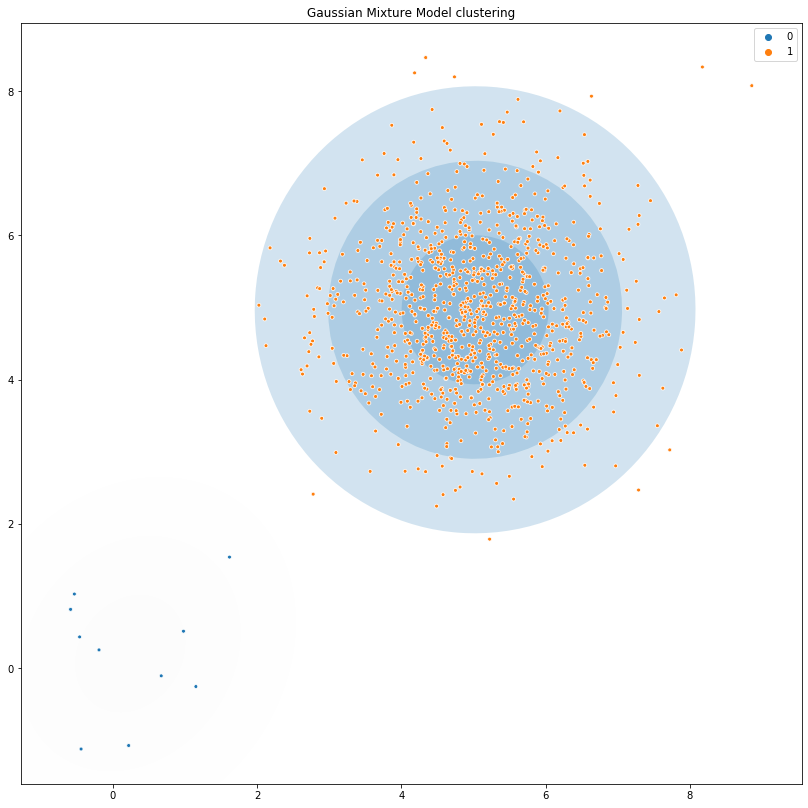

In [34]:
#Plot the results of GMM
gaussian = GaussianMixture(n_components=2, n_init=10)
plot_gmm(gaussian, X)

We see that the GMM model did a perfect job in grouping these datapoints together.

Another popular algorithm is DBSCAN. The main idea behind DBSCAN is that a datapoint belongs to a cluster if it is close to many points from that cluster. The advantages of DBSCAN are:
- We don't need to know the clusters beforehand
- The algorithm performs well on arbitrary shaped clusters
- The algorithm is robust on outliers and can detect them. 

DBSCAN requires two parameters: 

- eps: The distance that specifies the neighborhoods. Two points are considered neighbors if the distance between them are less then or equal to eps.
- minPts: Minimum number of points to form a cluster.

We need to normalize the data so that it is easier to find eps. 
Lets implement it using Sklearn and see how its performs. 

In [21]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
#Fit the DBSCAN model to the data
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [23]:
#Get the model attributes
labels = dbscan.labels_ #assigned clusters for each datapoint, -1 means noisy sample
core_samples = dbscan.core_sample_indices_ #Indices of the core samples
components = dbscan.components_ #copy of the core samples found by training

In [24]:
unique_labels = set(labels)
print(unique_labels)

{0, 1, 2, 3, 4, 5, -1}


As we can see from the unique labels, DBSCAN predicted 6 clusters (excluding noise) while the data only has 2 clusters. This is probably because of the varying in-cluster density of the data. Lets try other values for eps and min_samples. 

In [25]:
#Fit the DBSCAN model to the data
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=6)
dbscan.fit(X_scaled)

#Get the model attributes
labels = dbscan.labels_ #assigned clusters for each datapoint, -1 means noisy sample
core_samples = dbscan.core_sample_indices_ #Indices of the core samples
components = dbscan.components_ #copy of the core samples found by training

unique_labels = set(labels)
print(unique_labels)

{0, 1, -1}


This looks quite good. DBSCAN has predicted two clusters. Lets visualize the result. 

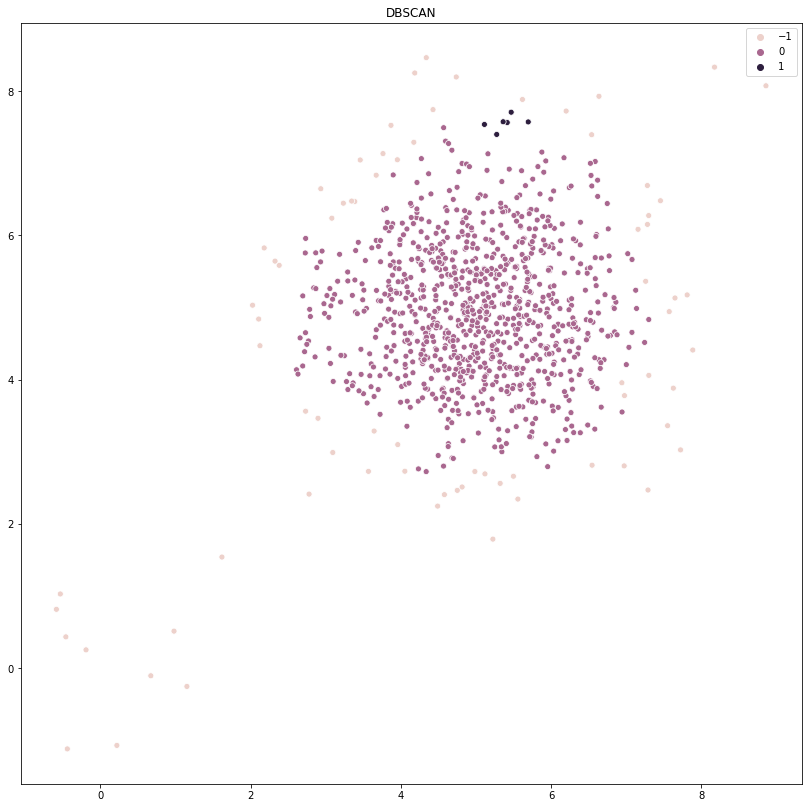

In [38]:
plt.figure(figsize=(14,14))
sns.scatterplot(X[:,0], X[:,1], hue=labels)
plt.title("DBSCAN")
plt.show()

We can see 3 colors: 
- light-pink: The outliers
- purple: a cluster
- black: a cluster

The clusters are not formed well. This is again because of the density of the clusters. For example, if we look at the big cluster at the right-top, the outer points of this cluster are a bit distant, they are more spread out then the inside datapoints. The DBSCAN algorithm thinks that those points belong to another cluster. 

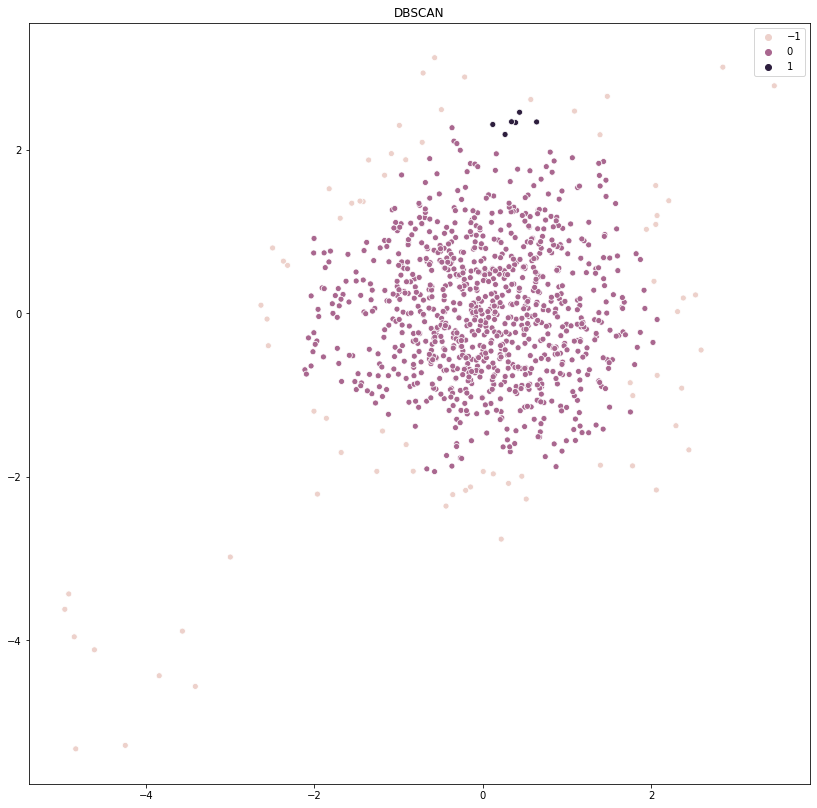

In [39]:
plt.figure(figsize=(14,14))
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=labels)
plt.title("DBSCAN")
plt.show()